In [1]:
import awkward as ak
import hist
import mplhep as hep
import matplotlib.pyplot as plt
#plt.style.use(hep.style.CMS)

In [2]:
obs_2017  = ak.Array([1.0, 23.0, 1.0, 16.0,  7.0, 14.0])
obs_2018  = ak.Array([1.0, 17.0, 1.0, 34.0, 14.0, 23.0])
pred_2017 = ak.Array([1.2, 21.7, 0.9, 18.0,  7.4, 15.4])
unc_2017  = ak.Array([0.3,  4.2, 0.1,  2.1,  1.2,  1.3])
pred_2018 = ak.Array([1.5, 33.3, 1.4, 27.5,  8.4, 22.3])
unc_2018  = ak.Array([0.3,  5.5, 0.2,  2.7,  1.3,  1.6])

In [3]:
def pull(obs, pred, unc):
    return (obs - pred)/unc

In [4]:
pulls_2017 = pull(obs_2017, pred_2017, unc_2017)
pulls_2018 = pull(obs_2018, pred_2018, unc_2018)
print(f"2017: {pulls_2017}")
print(f"2018: {pulls_2018}")

2017: [-0.667, 0.31, 1, -0.952, -0.333, -1.08]
2018: [-1.67, -2.96, -2, 2.41, 4.31, 0.437]


In [33]:
h = hist.Hist(hist.axis.Regular(21, -10, 10, name="pulls"))
h.fill(pulls_2017)
h.fill(pulls_2018)

Hist(Regular(21, -10, 10, name='pulls'), storage=Double()) # Sum: 12.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7faab45d4790>, errorbar=None, legend_artist=None)]

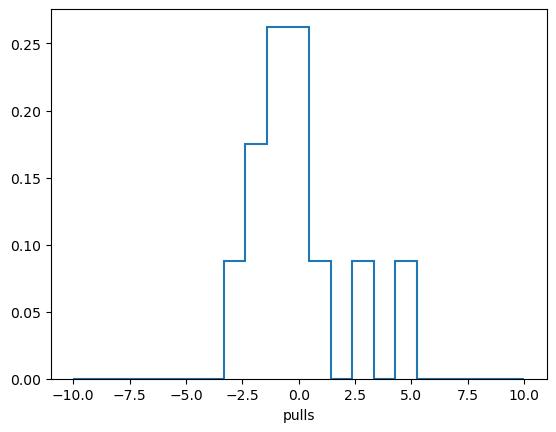

In [34]:
hep.histplot(h, yerr=False, density=True)

(FitResultArtists(line=<matplotlib.lines.Line2D object at 0x7faab50cea30>, errorbar=<ErrorbarContainer object of 3 artists>, band=<matplotlib.collections.PolyCollection object at 0x7faab50ae4c0>),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7faab50ae430>, errorbar=<ErrorbarContainer object of 3 artists>))

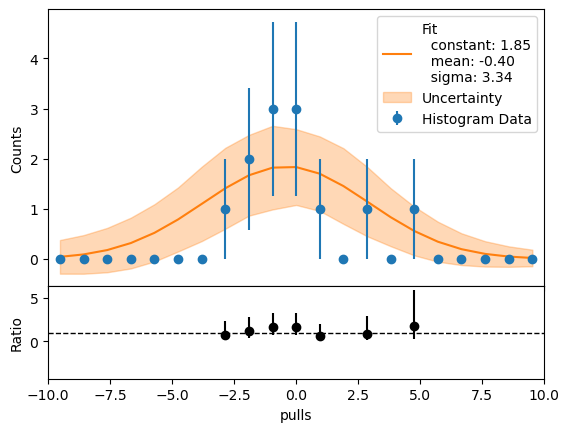

In [35]:
h.plot_ratio("gaus", fit_fmt="{name}: {value:.2f}")